<a href="https://colab.research.google.com/github/sikandarmir/DeepLearning/blob/main/Neural_Network_For_HandWritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network For Handwritten Digits Classification

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [22]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

load mnist dataset from keras 

In [59]:

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [60]:
len(X_train)

60000

In [61]:

len(X_test)

10000

In [62]:
X_train[0].shape

(28, 28)

In [64]:
# X_train[0]

In [7]:
# x_train[0]

In [65]:

y_train[0]

5

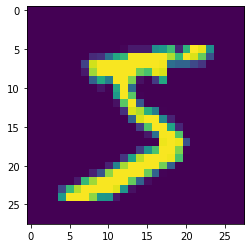

In [8]:
img=np.flip(x_train[0])
plt.imshow(x_train[0])


In [66]:
X_train = X_train / 255
X_test = X_test / 255

In [67]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [68]:
x_train.shape

(60000, 28, 28)

In [69]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [70]:
X_train_flattened.shape

(60000, 784)

In [72]:

# X_train_flattened[0]

In [30]:
# x_train_reshape[0]

In [73]:

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4718 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3042 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2727 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9259


In [74]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2696 - accuracy: 0.9251


[0.26955950260162354, 0.9251000285148621]

In [75]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.8853865e-02, 2.7410360e-07, 8.3336167e-02, 9.5588362e-01,
       2.8566346e-03, 1.1790369e-01, 1.1101665e-06, 9.9977285e-01,
       1.0596893e-01, 6.6309571e-01], dtype=float32)

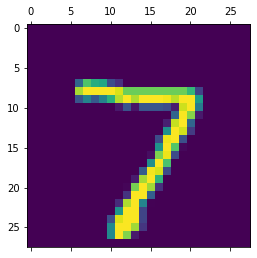

In [76]:
plt.matshow(X_test[0])

In [78]:
np.argmax(y_predicted[0])

7

In [79]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [80]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [81]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    2,    2,    0,    5,    2,    2,    1,    0],
       [   0, 1109,    4,    2,    0,    1,    3,    2,   14,    0],
       [   5,    7,  933,   15,    8,    2,   10,    8,   41,    3],
       [   5,    0,   24,  916,    2,   23,    1,    8,   24,    7],
       [   2,    1,    7,    1,  920,    0,    6,    4,   10,   31],
       [  11,    2,    7,   31,   11,  770,   10,    5,   39,    6],
       [  15,    3,   13,    1,    9,   18,  893,    2,    4,    0],
       [   1,    5,   26,    7,   10,    0,    0,  946,    2,   31],
       [   6,    6,    7,   15,    9,   21,    8,    8,  887,    7],
       [  11,    7,    1,   10,   32,    6,    0,   20,   11,  911]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

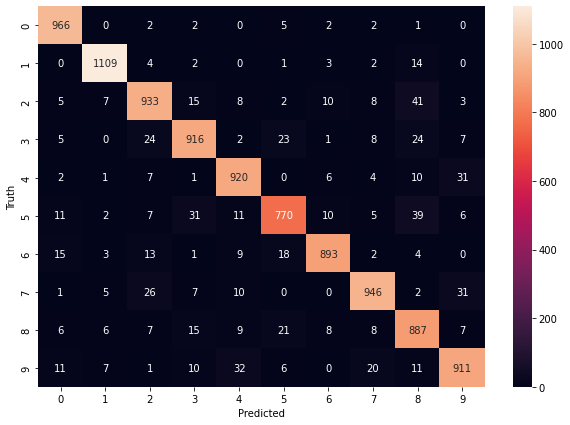

In [82]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [83]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2737 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1221 - accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0863 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0658 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0512 - accuracy: 0.9844


In [84]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0730 - accuracy: 0.9773


[0.07298483699560165, 0.9772999882698059]

Text(69.0, 0.5, 'Truth')

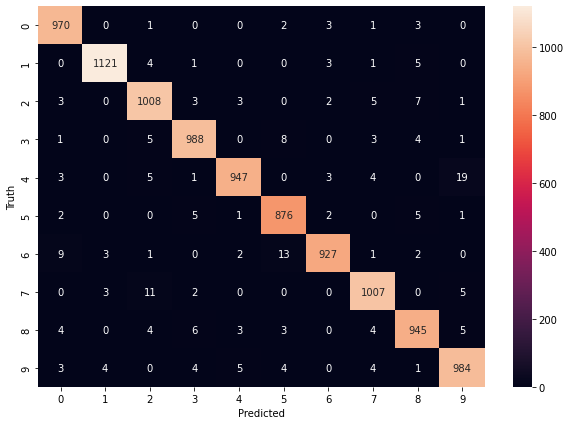

In [85]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [86]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2755 - accuracy: 0.9220
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1227 - accuracy: 0.9640
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0863 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0649 - accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0520 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0427 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0335 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0282 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0232 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [87]:

model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0835 - accuracy: 0.9772


[0.08349360525608063, 0.9771999716758728]